In [1]:
import pandas as pd
pd.set_option("display.max_columns", 1000)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
sns.set_style('ticks')
import scipy.stats as stats
import statsmodels.stats.multitest as multitest

Matplotlib created a temporary cache directory at /scratch/naotok/3243018/matplotlib-fpa9ppet because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
df = pd.read_csv(

    "/rhome/naotok/bigdata/Upf2_paper/eCLIP/mm10.UPF1_MOCK_IP.umi.r1.fq.genome-mappedSoSo.rmDupSo.broadfeatures_combined.l2fcwithpval_enr_Naoto.tsv",
    sep = "\t"

)

df = df.drop('Data before "|"', axis = 1).drop('Data after "|"', axis = 1)

result_df = pd.DataFrame()
for region in [i.split("|")[1] for i in df.columns[2:]]:
    
    col = "|" + region
    k = [j for j in df.columns if j.endswith(col)][0]
    
    df["FC"] = df[k].str.split("|", expand = True)[0].astype(float)
    df["log_P"] = df[k].str.split("|", expand = True)[1].astype(float)
    df["Region"] = region
    
    result_df = pd.concat(
    
        (result_df, df[["Gene name", "FC", "log_P", "Region"]])    
        
    )
    
result_df = result_df.reset_index()

In [3]:
# color
result_df.loc[
    (result_df['log_P'] > 5) &
    (result_df['FC'] > 3),
    "color"
] = "salmon"

result_df = result_df.fillna({"color": "grey"})

In [5]:
result_df.loc[result_df['log_P'] >= 100, 'log_P_plot'] = 100
result_df.loc[result_df['log_P'] < 100, 'log_P_plot'] = result_df['log_P']

In [6]:
def scatter(REGION: str):

    plot_df = result_df[result_df['Region'] == REGION].replace("NaN", np.nan).dropna()
    
    # scatter plot
    fig = plt.figure(figsize = (4, 4))
    ax = fig.add_subplot(111)

    ax = plt.scatter(

        data = plot_df[plot_df['color'] == "grey"],
        x = "FC",
        y = "log_P_plot",
        color = plot_df[plot_df['color'] == "grey"]['color'],
        alpha = 0.1,
        s = 40

    )

    ax = plt.scatter(

        data = plot_df[plot_df['color'] != "grey"],
        x = "FC",
        y = "log_P_plot",
        color = plot_df[plot_df['color'] != "grey"]['color'],
        alpha = 0.1,
        s = 40

    )

    
    ax = plt.scatter(

        data = plot_df[plot_df['Gene name'] == "Cdkn1a"],
        x = "FC",
        y = "log_P_plot",
        color = plot_df[plot_df['Gene name'] == "Cdkn1a"]['color'],
        edgecolor = "black",
        marker = "D",
        s = 80

    )

    plt.title(REGION)
    plt.xlabel("Log$_{2}$(Fold change)")
    plt.ylabel("-Log$_{10}$($\it{P}$)")

    sns.despine()
    plt.tight_layout()
    
    plt.savefig("/rhome/naotok/Upf2_paper/figure/Upf1_CLiP_scatter_" + REGION + ".png", dpi = 1000)

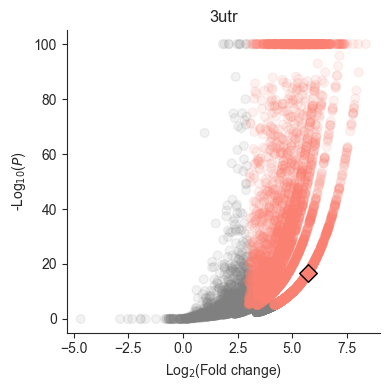

In [7]:
for region in ["3utr"]:
    
    scatter(region)